In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read in the HAGL dataset from a CSV file
df=pd.read_csv("E:\HAGLdataset.csv")

In [3]:
# Convert the 'date' column to a datetime data type
df['date']=pd.to_datetime(df.date,format='%m/%d/%Y')

In [4]:
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['date'].values))

In [19]:
#Describe the data
df.describe()

,price,Open,High,Low
count,1812.000000,1812.000000,1812.000000,1812.000000
mean,6989.701987,7000.524283,7141.986755,6866.313466
std,2831.815190,2840.975405,2915.588395,2769.333004
min,2550.000000,2450.000000,2630.000000,2400.000000
25%,5040.000000,5040.000000,5100.000000,4980.000000
50%,5870.000000,5900.000000,6005.000000,5765.000000
75%,8400.000000,8400.000000,8550.000000,8290.000000
max,15650.000000,15950.000000,16200.000000,15300.000000


In [5]:
# Create a new DataFrame containing only the 'date' and 'price' columns
df1 = pd.DataFrame(df, columns=['date', 'price'])

# Set the index of the DataFrame to the 'date' column
df1.index = df1.date

# Drop the 'date' column from the DataFrame
df1.drop('date', axis=1, inplace=True)

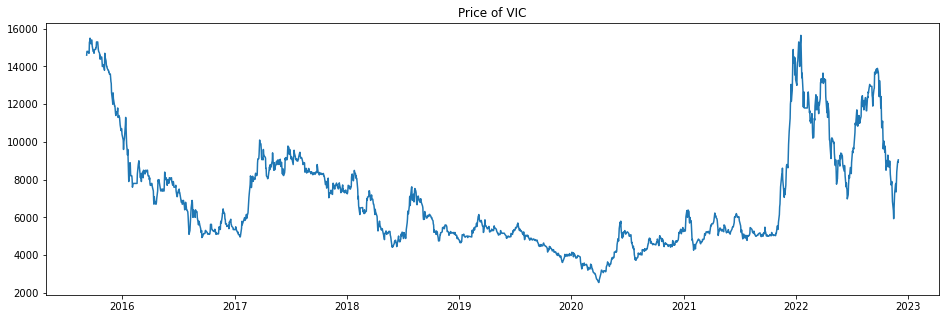

In [6]:
# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df['price'])
plt.title('Price of HAG')
plt.show()

In [7]:
# Split the 'df1' DataFrame into train and test datasets

# Convert the 'df1' DataFrame to a NumPy array
data = df1.values

# Calculate the number of rows to use for the train dataset
t = .7
t = int(t * len(df))

# Extract the train dataset from the data array
train_data = data[:t]

# Extract the test dataset from the data array
test_data = data[t:]

In [8]:
# Scale the data using a MinMaxScaler

# Create a MinMaxScaler object with a specified range
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

In [9]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 30th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [10]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 64 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1), return_sequences=True,kernel_regularizer=l2(0.01)))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=True))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=False))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_HAG.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.16916, saving model to save_model_7-3.hdf5
26/26 - 10s - loss: 0.1692 - 10s/epoch - 393ms/step
Epoch 2/80

Epoch 2: loss improved from 0.16916 to 0.07794, saving model to save_model_7-3.hdf5
26/26 - 0s - loss: 0.0779 - 331ms/epoch - 13ms/step
Epoch 3/80

Epoch 3: loss improved from 0.07794 to 0.05281, saving model to save_model_7-3.hdf5
26/26 - 0s - loss: 0.0528 - 328ms/epoch - 13ms/step
Epoch 4/80

Epoch 4: loss improved from 0.05281 to 0.04789, saving model to save_model_7-3.hdf5
26/26 - 0s - loss: 0.0479 - 354ms/epoch - 14ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04789 to 0.04393, saving model to save_model_7-3.hdf5
26/26 - 0s - loss: 0.0439 - 306ms/epoch - 12ms/step
Epoch 6/80

Epoch 6: loss improved from 0.04393 to 0.04196, saving model to save_model_7-3.hdf5
26/26 - 0s - loss: 0.0420 - 323ms/epoch - 12ms/step
Epoch 7/80

Epoch 7: loss improved from 0.04196 to 0.04082, saving model to save_model_7-3.hdf5
26/26 - 0s - loss: 0

In [13]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7-3_HAG.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

40/40 [==============================] - 3s 5ms/step


In [14]:
# Preprocess the test data
test = df1[len(train_data)-5:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[t:]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

17/17 [==============================] - 0s 5ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\612936592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['pred'] = y_train_predict
C:\Users\Dell\AppData\Local\Temp\ipykernel_23328\612936592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred'] = y_test_predict


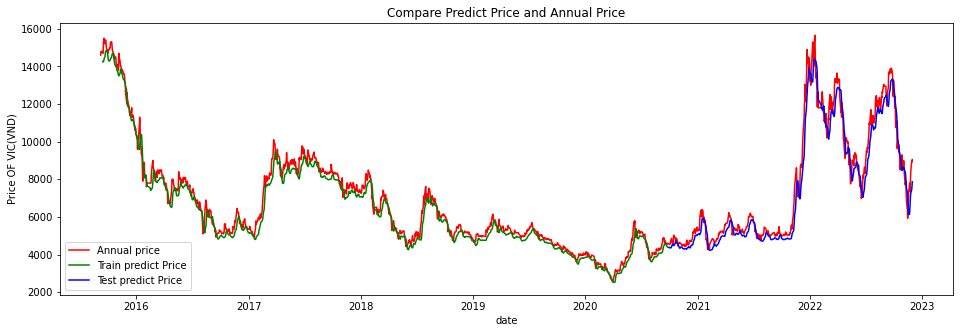

In [15]:
# Create DataFrames for the training and test data
train_data1 = df1[5:t]
test_data1 = df1[t:]

# Create a plot to compare the predicted and true values for the training and test data
plt.figure(figsize=(16,5))
plt.plot(df1, label='Annual price', color='r')
train_data1['pred'] = y_train_predict
plt.plot(train_data1['pred'], label='Train predict Price', color='g')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('date')
plt.ylabel('Price OF HAG(VND)')
plt.legend()
plt.show()

In [16]:
#Train data
# Calculate performance metrics for the training data
mae = mean_absolute_error(y_train, y_train_predict)  # Mean Absolute Error (MAE)
mape = mean_absolute_percentage_error(y_train, y_train_predict)  # Mean Absolute Percentage Error (MAPE)
mse = mean_squared_error(y_train, y_train_predict)  # Mean Squared Error (MSE)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_train, y_train_predict)  # R-squared (R2)

# Print the performance metrics
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 301.22
MAPE: 4.70%
MSE: 152479.48
RMSE: 390.49
R2: 0.98


In [17]:
#Test data
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 502.53
MAPE: 6.17%
MSE: 443179.06
RMSE: 665.72
R2: 0.96


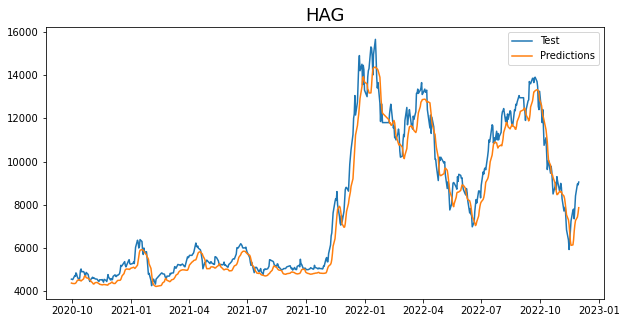

In [20]:
# Create a plot to compare the predicted and true values for the test data
plt.figure(figsize=(10,5))
plt.plot(test_data1[['price','pred']])
plt.legend(['Test','Predictions'])
plt.title('HAG', fontsize=18)
plt.show()